In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install yfinance
!pip install requests
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 11.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-c

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import time
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
!pip install webdriver-manager

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import requests
import sys
import traceback
from getpass import getpass
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.support import expected_conditions as EC

# Get Data

## Solana

In [5]:
solana_df = yf.download("SOL-USD", start="2021-01-01", end=datetime.today().strftime('%Y-%m-%d'))
solana_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,1.509775,1.859656,1.502038,1.842084,1.842084,25722549
2021-01-02,1.845586,1.989295,1.721482,1.799275,1.799275,31671064
2021-01-03,1.799902,2.364981,1.799902,2.161752,2.161752,55073422
2021-01-04,2.162412,2.485097,1.876342,2.485097,2.485097,59955405
2021-01-05,2.490982,2.502616,2.077742,2.157217,2.157217,50555207
...,...,...,...,...,...,...
2022-05-28,41.493732,44.658012,40.548679,44.343163,44.343163,1254325884
2022-05-29,44.338791,45.386253,41.998047,44.909615,44.909615,1317843243
2022-05-30,44.908669,47.936829,44.357407,47.179443,47.179443,1708817065


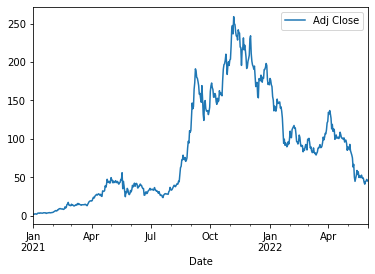

In [6]:
solana_df.plot(y = "Adj Close", use_index=True)

## Ethereum 

In [7]:
ethereum_df = yf.download("ETH-USD", start="2018-01-01", end=datetime.today().strftime('%Y-%m-%d'))
ethereum_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2595760128
2018-01-02,772.346008,914.830017,772.346008,884.443970,884.443970,5783349760
2018-01-03,886.000000,974.471008,868.450989,962.719971,962.719971,5093159936
2018-01-04,961.713013,1045.079956,946.085999,980.921997,980.921997,6502859776
2018-01-05,975.750000,1075.390015,956.325012,997.719971,997.719971,6683149824
...,...,...,...,...,...,...
2022-05-25,1978.677002,2014.369507,1943.938599,1944.827881,1944.827881,13364545730
2022-05-26,1945.033325,1962.171143,1759.199585,1803.913330,1803.913330,23458681818
2022-05-27,1802.543823,1814.656494,1721.264771,1724.922852,1724.922852,25470760032


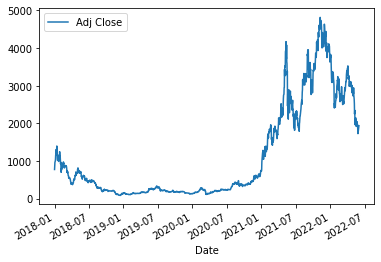

In [8]:
ethereum_df.plot(y = "Adj Close", use_index=True)

## Bitcoin

In [9]:
bitcoin_df = yf.download("BTC-USD", start="2018-01-01", end=datetime.today().strftime('%Y-%m-%d'))
bitcoin_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072
...,...,...,...,...,...,...
2022-05-25,29653.134766,30157.785156,29384.949219,29562.361328,29562.361328,27525063551
2022-05-26,29564.777344,29834.160156,28261.906250,29267.224609,29267.224609,36774325352
2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,28627.574219,36582005748


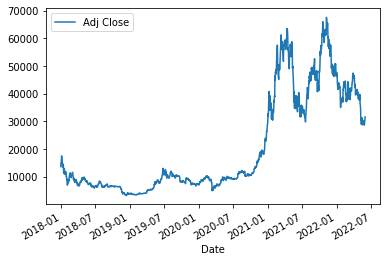

In [10]:
bitcoin_df.plot(y = "Adj Close", use_index=True)

In [11]:
bitcoin_df = bitcoin_df.reset_index()[['Date', 'Adj Close', 'Volume']]
bitcoin_df.rename(columns={"Date": "dates", "Adj Close" : "btc adj close", "Volume" : "btc volume"}, inplace = True)
bitcoin_df['dates'] = bitcoin_df['dates'].astype(str)

ethereum_df = ethereum_df.reset_index()[['Date', 'Adj Close', 'Volume']]
ethereum_df.rename(columns={"Date": "dates", "Adj Close" : "eth adj close", "Volume" : "eth volume"}, inplace = True)
ethereum_df['dates'] = ethereum_df['dates'].astype(str)

solana_df = solana_df.reset_index()[['Date', 'Adj Close', 'Volume']]
solana_df.rename(columns={"Date": "dates", "Adj Close" : "sol adj close", "Volume" : "sol volume"}, inplace = True)
solana_df['dates'] = solana_df['dates'].astype(str)

## Rarible

In [12]:
dict_collections = {}
list_broken_urls = []
url_top_100 = 'https://api-mainnet.rarible.com/marketplace/api/v4/collections/top?days=30&size=100'
url_collections = 'https://rarible-cdn.reallm.io/collections/{}/{}?filters=%7B%7D'
broken_collection_url = 'https://rarible.com/collection/{}/stats?range=-Number.MAX_SAFE_INTEGER'
list_features = ['marketcap', 'lowwatermark', 'transactions', 'owners', 'sellers', 'buyers']


def get_collections_id(url):
    json = requests.get(
        url
    ).json()

    df_id = pd.DataFrame.from_dict(json)
    df_id = df_id[['id', 'name']]
    return df_id


def change_collection_data(df, feature):
    if feature == 'prices':
        df.rename(columns = {'dates': 'dates'}, inplace = True)
    elif feature == 'marketcap':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'marketcap'}, inplace = True)
        df = df[['dates', 'marketcap']]
    elif feature == 'lowwatermark':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'lowwatermark'}, inplace = True)
        df = df[['dates', 'lowwatermark']]
    elif feature == 'transactions':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'amount_transactions'}, inplace = True)
        df = df[['dates', 'amount_transactions']]
    elif feature == 'owners':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'amount_owners'}, inplace = True)
        df = df[['dates', 'amount_owners']]
    elif feature == 'sellers':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'amount_sellers'}, inplace = True)
        df = df[['dates', 'amount_sellers']]
    elif feature == 'buyers':
        df.rename(columns = {'graph_dates': 'dates',
                            'graph_values': 'amount_buyers'}, inplace = True)
        df = df[['dates', 'amount_buyers']]
    
    return df


def get_collection_data(id, features):
    df = pd.read_json(url_collections.format(id, 'prices'))
    for feature in features:
        tmp = pd.read_json(url_collections.format(id, feature))
        df = df.merge(change_collection_data(tmp, feature), how='left', on='dates')
        
    return df


def add_stocks(df):
    df = df.merge(bitcoin_df, how='left', on='dates')
    df = df.merge(ethereum_df, how='left', on='dates')
    df = df.merge(solana_df, how='left', on='dates')
    
    return df


def replace_nan(df):
    for i in df.columns[df.isnull().any(axis=0)]:
        for index, value in df[i].items():
            if np.isnan(value):
                try:
                    df[i].at[index] = df[i].iloc[index-3: index].mean()
                except:
                    pass

    return df    


df_id = get_collections_id(url_top_100)
for index, row in df_id.iterrows():
    try:
        tmp = get_collection_data(row['id'], list_features)
        tmp = replace_nan(tmp)
        tmp = add_stocks(tmp)
        dict_collections[row['name']] = tmp
        print("collection:", row['name'], "done")
    except:
        print("collection:", row['name'], "has not got dataset")
        print("url:", broken_collection_url.format(row['id']))
        list_broken_urls.append(broken_collection_url.format(row['id']))
        pass


collection: Otherdeed done
collection: Azuki done
collection: Bored Ape Yacht Club done
collection: projectPXN done
collection: MutantApeYachtClub done
collection: BEANZ Official done
collection: CloneX done
collection: Doodles done
collection: Moonbirds done
collection: Murakami.Flowers done
collection: goblintown done
collection: ENS domains has not got dataset
url: https://rarible.com/collection/0x57f1887a8bf19b14fc0df6fd9b2acc9af147ea85/stats?range=-Number.MAX_SAFE_INTEGER
collection: Murakami.Flowers Seed done
collection: Art Blocks Factory done
collection: Ragnarok done
collection: Chimpers done
collection: Something Token done
collection: DEGEN TOONZ done
collection: Meebits done
collection: Genesis done
collection: BoredApeKennelClub done
collection: Mindblowon done
collection: Bored Ape Chemistry Club done
collection: VeeFriends Series 2 done
collection: adidas Originals: Into the Metaverse done
collection: AIMoonbirds done
collection: RTFKT - MNLTH done
collection: Rektguy do

In [13]:
with open('dataset.txt', 'w') as f:
    print(dict_collections, file=f)

In [14]:
dict_collections['MutantApeYachtClub']

,dates,prices_avg,prices_floor,prices_median,volume,marketcap,lowwatermark,amount_transactions,amount_owners,amount_sellers,amount_buyers,btc adj close,btc volume,eth adj close,eth volume,sol adj close,sol volume
0,2021-08-29,30573.945494,0.000000,25978.451172,1.706332e+08,9.277673e+03,21245.703,5581,7080.0,5.0,37.000000,48829.832031,2.588965e+10,3227.002686,1.329659e+10,94.469673,1830344091
1,2021-08-30,42150.432895,0.000000,32023.800781,4.611257e+07,3.916317e+06,20522.010,1094,7503.0,2.0,46.000000,47054.984375,3.184701e+10,3224.374268,1.930692e+10,110.544807,5274104165
2,2021-08-31,34728.502238,0.000000,28324.003906,1.972579e+07,7.019255e+06,20522.010,568,7693.0,3.0,24.000000,47166.687500,3.473036e+10,3433.732666,2.728050e+10,108.483772,7590894022
3,2021-09-01,34049.167712,1848.198730,24513.210938,1.637765e+07,2.655862e+07,20522.010,481,7793.0,6.0,42.000000,48847.027344,3.913940e+10,3834.828125,3.007089e+10,111.033005,3974443896
4,2021-09-02,26299.774417,12414.097656,22857.037109,1.041471e+07,1.794458e+08,20522.010,396,7933.0,9.0,21.000000,49327.722656,3.950807e+10,3790.989990,2.438740e+10,128.102386,5074399603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,2022-05-27,31995.654297,28179.476562,31394.842773,8.318870e+05,5.221657e+08,24113.527,26,13925.0,204.0,1.015332,28627.574219,3.658201e+10,1724.922852,2.547076e+10,40.981346,2256358026
267,2022-05-28,31780.733774,28392.847656,31653.021484,4.131495e+05,5.261195e+08,24113.527,13,13935.0,172.0,1.011433,28814.900391,3.551958e+10,1757.941772,2.321478e+10,44.343163,1254325884
268,2022-05-29,31486.014927,27646.226562,30542.651367,4.408042e+05,5.122846e+08,24113.527,14,13943.0,136.0,1.008922,NaN,NaN,NaN,NaN,44.909615,1317843243
269,2022-05-30,37633.173665,31727.736328,34251.246094,4.515981e+05,5.879150e+08,24113.527,12,13964.0,61.0,1.011896,NaN,NaN,NaN,NaN,47.179443,1708817065


Testing models

In [71]:
from statsmodels.api import OLS
from sklearn.metrics import r2_score, mean_squared_error

In [36]:
dict_collections["MutantApeYachtClub"].columns

Index(['dates', 'prices_avg', 'prices_floor', 'prices_median', 'volume',
       'marketcap', 'lowwatermark', 'amount_transactions', 'amount_owners',
       'amount_sellers', 'amount_buyers', 'btc adj close', 'btc volume',
       'eth adj close', 'eth volume', 'sol adj close', 'sol volume'],
      dtype='object')

In [56]:
X = dict_collections["MutantApeYachtClub"][["lowwatermark", "amount_transactions", "amount_owners", "amount_sellers", "amount_buyers"]]
X

,lowwatermark,amount_transactions,amount_owners,amount_sellers,amount_buyers
0,21245.703,5581,7080.0,5.0,37.000000
1,20522.010,1094,7503.0,2.0,46.000000
2,20522.010,568,7693.0,3.0,24.000000
3,20522.010,481,7793.0,6.0,42.000000
4,20522.010,396,7933.0,9.0,21.000000
...,...,...,...,...,...
266,24113.527,26,13925.0,204.0,1.015332
267,24113.527,13,13935.0,172.0,1.011433
268,24113.527,14,13943.0,136.0,1.008922
269,24113.527,12,13964.0,61.0,1.011896


In [57]:
y = dict_collections["MutantApeYachtClub"]["prices_avg"]
# X = dict_collections["MutantApeYachtClub"][["prices_avg", "volume"]]

# reg = LinearRegression().fit(X, y)
reg = OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             prices_avg   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.862
Method:                 Least Squares   F-statistic:                              338.6
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                   4.33e-113
Time:                        12:47:02   Log-Likelihood:                         -3068.4
No. Observations:                 271   AIC:                                      6147.
Df Residuals:                     266   BIC:                                      6165.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
lowwatermark            1.2489      0.227      5.511      0.000       0.803       1.695
amount_transactions    -5.9766      3.673     -1.627      0.105     -13.208       1.254
amount_owners           2.4361      0.374      6.521      0.000       1.701       3.172
amount_sellers          3.8666      3.692      1.047      0.296      -3.402      11.136
amount_buyers         138.7064    105.253      1.318      0.189     -68.528     345.941
==============================================================================
Omnibus:                       37.260   Durbin-Watson:                   0.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.249
Skew:                           0.998   Prob(JB):                     3.33e-11
Kurtosis:                       3.539   Cond. No.                     1.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
X = dict_collections["MutantApeYachtClub"][["amount_transactions", "amount_owners", "amount_sellers", "amount_buyers"]]
X

,amount_transactions,amount_owners,amount_sellers,amount_buyers
0,5581,7080.0,5.0,37.000000
1,1094,7503.0,2.0,46.000000
2,568,7693.0,3.0,24.000000
3,481,7793.0,6.0,42.000000
4,396,7933.0,9.0,21.000000
...,...,...,...,...
266,26,13925.0,204.0,1.015332
267,13,13935.0,172.0,1.011433
268,14,13943.0,136.0,1.008922
269,12,13964.0,61.0,1.011896


In [59]:
y = dict_collections["MutantApeYachtClub"]["prices_median"]
# X = dict_collections["MutantApeYachtClub"][["prices_avg", "volume"]]

# reg = LinearRegression().fit(X, y)
reg = OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          prices_median   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.836
Method:                 Least Squares   F-statistic:                              346.6
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                   2.18e-104
Time:                        12:47:02   Log-Likelihood:                         -3075.4
No. Observations:                 271   AIC:                                      6159.
Df Residuals:                     267   BIC:                                      6173.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
amount_transactions    -2.9364      3.705     -0.792      0.429     -10.232       4.359
amount_owners           4.0916      0.149     27.460      0.000       3.798       4.385
amount_sellers          1.7609      3.764      0.468      0.640      -5.651       9.173
amount_buyers         -43.9914    105.251     -0.418      0.676    -251.219     163.236
==============================================================================
Omnibus:                       50.197   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.520
Skew:                           1.179   Prob(JB):                     1.79e-16
Kurtosis:                       3.928   Cond. No.                         960.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:

reg = OLS(y_train, X_train).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          prices_median   R-squared (uncentered):                   0.833
Model:                            OLS   Adj. R-squared (uncentered):              0.829
Method:                 Least Squares   F-statistic:                              263.6
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                    4.66e-81
Time:                        12:50:47   Log-Likelihood:                         -2457.1
No. Observations:                 216   AIC:                                      4922.
Df Residuals:                     212   BIC:                                      4936.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
amount_transactions    -2.0571      3.884     -0.530      0.597      -9.713       5.599
amount_owners           4.1776      0.176     23.749      0.000       3.831       4.524
amount_sellers         -0.4526      4.882     -0.093      0.926     -10.077       9.171
amount_buyers         -80.6135    128.136     -0.629      0.530    -333.198     171.971
==============================================================================
Omnibus:                       39.288   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.461
Skew:                           1.156   Prob(JB):                     1.49e-12
Kurtosis:                       3.838   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
predictions = reg.predict(X_test)
df_results = pd.DataFrame({"Actual": y_test, "Predicted": predictions})
# df_results

In [72]:
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print(RMSE, r2)

18270.97813648052 0.3671161120382894
